# NBA retirement prediction

In [572]:
# Install dependencies as needed:
# pip install kagglehub
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# DATA:

# Player Totals

In [573]:
# Set the path to the file you'd like to load
file_path = "Player Totals.csv"

# Load the latest version
playerTotalsDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print(playerTotalsDf.head())

   season   lg            player  player_id   age team pos   g    gs     mp  \
0    2026  NBA  Precious Achiuwa  achiupr01  26.0  SAC   C  14   6.0  293.0   
1    2026  NBA      Steven Adams  adamsst01  32.0  HOU   C  15   4.0  324.0   
2    2026  NBA       Bam Adebayo  adebaba01  28.0  MIA   C  14  14.0  425.0   
3    2026  NBA      Ochai Agbaji  agbajoc01  25.0  TOR  SG  15   1.0  204.0   
4    2026  NBA      Santi Aldama  aldamsa01  25.0  MEM  PF  21   2.0  548.0   

   ...   orb    drb    trb  ast   stl   blk   tov    pf  pts  trp_dbl  
0  ...  25.0   48.0   73.0   14   9.0   6.0   7.0  24.0  102      0.0  
1  ...  74.0   67.0  141.0   23  10.0  10.0  15.0  29.0   97      0.0  
2  ...  18.0  101.0  119.0   36  13.0  11.0  26.0  20.0  264      0.0  
3  ...   5.0   23.0   28.0   10   6.0   2.0   5.0  26.0   46      0.0  
4  ...  31.0  108.0  139.0   63  20.0  16.0  23.0  26.0  282      0.0  

[5 rows x 33 columns]


<Axes: xlabel='gs', ylabel='pts'>

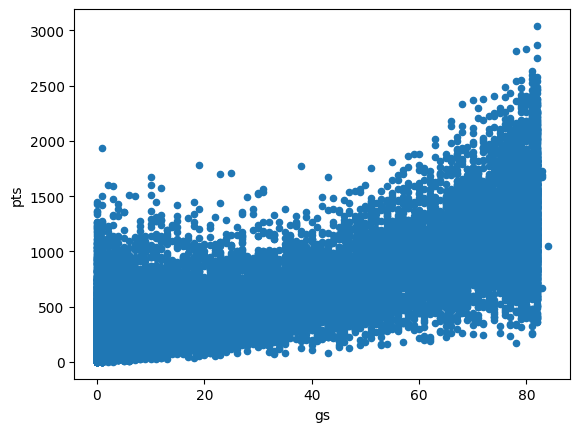

In [574]:
playerTotalsDf.plot.scatter(x='gs', y='pts')

# Player Per Game

In [575]:
# Set the path to the file you'd like to load
file_path = "Player Per Game.csv"

# Load the latest version
playerPerGameDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
)

print(playerPerGameDf.head())

   season   lg            player  player_id   age team pos   g    gs  \
0    2026  NBA  Precious Achiuwa  achiupr01  26.0  SAC   C  14   6.0   
1    2026  NBA      Steven Adams  adamsst01  32.0  HOU   C  15   4.0   
2    2026  NBA       Bam Adebayo  adebaba01  28.0  MIA   C  14  14.0   
3    2026  NBA      Ochai Agbaji  agbajoc01  25.0  TOR  SG  15   1.0   
4    2026  NBA      Santi Aldama  aldamsa01  25.0  MEM  PF  21   2.0   

   mp_per_game  ...  ft_percent  orb_per_game  drb_per_game  trb_per_game  \
0         20.9  ...       0.458           1.8           3.4           5.2   
1         21.6  ...       0.775           4.9           4.5           9.4   
2         30.4  ...       0.806           1.3           7.2           8.5   
3         13.6  ...       0.700           0.3           1.5           1.9   
4         26.1  ...       0.673           1.5           5.1           6.6   

   ast_per_game  stl_per_game  blk_per_game  tov_per_game  pf_per_game  \
0           1.0           0.6 

<Axes: xlabel='gs', ylabel='pts'>

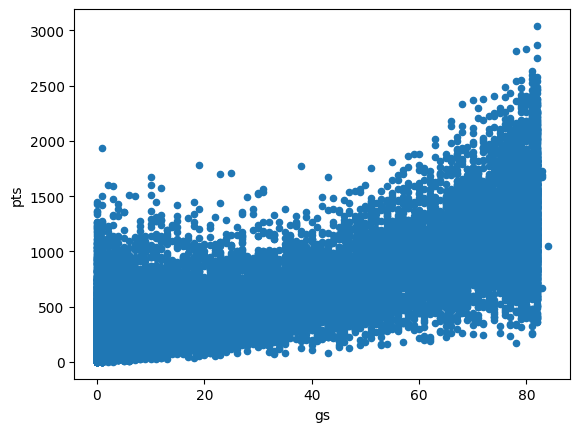

In [576]:
playerTotalsDf.plot.scatter(x='gs', y='pts')

# Player Per 36 Mins

In [577]:
# Set the path to the file you'd like to load
file_path = "Per 36 Minutes.csv"

# Load the latest version
per36MinsDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
)

print(per36MinsDf.head())

   season   lg            player  player_id   age team pos   g    gs   mp  \
0    2026  NBA  Precious Achiuwa  achiupr01  26.0  SAC   C  14   6.0  293   
1    2026  NBA      Steven Adams  adamsst01  32.0  HOU   C  15   4.0  324   
2    2026  NBA       Bam Adebayo  adebaba01  28.0  MIA   C  14  14.0  425   
3    2026  NBA      Ochai Agbaji  agbajoc01  25.0  TOR  SG  15   1.0  204   
4    2026  NBA      Santi Aldama  aldamsa01  25.0  MEM  PF  21   2.0  548   

   ...  ft_percent  orb_per_36_min  drb_per_36_min  trb_per_36_min  \
0  ...       0.458             3.1             5.9             9.0   
1  ...       0.775             8.2             7.4            15.7   
2  ...       0.806             1.5             8.6            10.1   
3  ...       0.700             0.9             4.1             4.9   
4  ...       0.673             2.0             7.1             9.1   

   ast_per_36_min  stl_per_36_min  blk_per_36_min  tov_per_36_min  \
0             1.7             1.1             0

# Player Per 100 Possesions

In [578]:
# Set the path to the file you'd like to load
file_path = "Per 100 Poss.csv"

# Load the latest version
per100PossDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
)

print(per100PossDf.head())

   season   lg            player  player_id  age team pos   g    gs   mp  ...  \
0    2026  NBA  Precious Achiuwa  achiupr01   26  SAC   C  14   6.0  293  ...   
1    2026  NBA      Steven Adams  adamsst01   32  HOU   C  15   4.0  324  ...   
2    2026  NBA       Bam Adebayo  adebaba01   28  MIA   C  14  14.0  425  ...   
3    2026  NBA      Ochai Agbaji  agbajoc01   25  TOR  SG  15   1.0  204  ...   
4    2026  NBA      Santi Aldama  aldamsa01   25  MEM  PF  21   2.0  548  ...   

   drb_per_100_poss  trb_per_100_poss  ast_per_100_poss  stl_per_100_poss  \
0               7.8              11.8               2.3               1.5   
1              10.3              21.7               3.5               1.5   
2              10.8              12.7               3.9               1.4   
3               5.4               6.6               2.4               1.4   
4               9.4              12.1               5.5               1.7   

   blk_per_100_poss  tov_per_100_poss  pf_per_100_

# Player Advanced Stats

In [579]:
# Set the path to the file you'd like to load
file_path = "Advanced.csv"

# Load the latest version
advancedStatsDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
)

print(advancedStatsDf.head())

   season   lg            player  player_id   age team pos   g    gs     mp  \
0    2026  NBA  Precious Achiuwa  achiupr01  26.0  SAC   C  14   6.0  293.0   
1    2026  NBA      Steven Adams  adamsst01  32.0  HOU   C  15   4.0  324.0   
2    2026  NBA       Bam Adebayo  adebaba01  28.0  MIA   C  14  14.0  425.0   
3    2026  NBA      Ochai Agbaji  agbajoc01  25.0  TOR  SG  15   1.0  204.0   
4    2026  NBA      Santi Aldama  aldamsa01  25.0  MEM  PF  21   2.0  548.0   

   ...  tov_percent  usg_percent  ows  dws   ws  ws_48  obpm  dbpm  bpm  vorp  
0  ...          7.1         14.3  0.3  0.2  0.4  0.068  -1.4  -0.8 -2.2   0.0  
1  ...         15.4         12.4  0.9  0.5  1.4  0.208   2.3  -0.3  1.9   0.3  
2  ...         10.1         24.5  0.3  0.8  1.1  0.119   0.9   1.1  2.0   0.4  
3  ...          8.6         12.1 -0.2  0.2  0.1  0.017  -6.6  -0.3 -6.9  -0.3  
4  ...          8.3         20.9  0.6  0.8  1.3  0.118   1.9   1.2  3.1   0.7  

[5 rows x 30 columns]


# Player play by play stats

In [580]:
# Set the path to the file you'd like to load
file_path = "Player Play By Play.csv"

# Load the latest version
playByPlayDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
)

print(playByPlayDf.head())

   season   lg            player  player_id  age team pos   g  gs   mp  ...  \
0    2026  NBA  Precious Achiuwa  achiupr01   26  SAC   C  14   6  293  ...   
1    2026  NBA      Steven Adams  adamsst01   32  HOU   C  15   4  324  ...   
2    2026  NBA       Bam Adebayo  adebaba01   28  MIA   C  14  14  425  ...   
3    2026  NBA      Ochai Agbaji  agbajoc01   25  TOR  SG  15   1  204  ...   
4    2026  NBA      Santi Aldama  aldamsa01   25  MEM  PF  21   2  548  ...   

   net_plus_minus_per_100_poss  bad_pass_turnover  lost_ball_turnover  \
0                          6.4                  2                   1   
1                          9.8                  5                   3   
2                          8.5                 10                  11   
3                          1.3                  2                   2   
4                         -3.5                 11                   7   

   shooting_foul_committed  offensive_foul_committed  shooting_foul_drawn  \
0        

# Height and Weight Data

In [581]:
# Set the path to the file you'd like to load
file_path = "Players.csv"

# Load the latest version
HeightAndWeightDf = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "drgilermo/nba-players-stats",
  file_path,
)

HeightAndWeightDf = HeightAndWeightDf.rename(columns={'Player': 'player'})
print(HeightAndWeightDf.head())

   Unnamed: 0           player  height  weight  \
0           0  Curly Armstrong   180.0    77.0   
1           1     Cliff Barker   188.0    83.0   
2           2    Leo Barnhorst   193.0    86.0   
3           3       Ed Bartels   196.0    88.0   
4           4      Ralph Beard   178.0    79.0   

                           collage    born   birth_city birth_state  
0               Indiana University  1918.0          NaN         NaN  
1           University of Kentucky  1921.0     Yorktown     Indiana  
2         University of Notre Dame  1924.0          NaN         NaN  
3  North Carolina State University  1925.0          NaN         NaN  
4           University of Kentucky  1927.0  Hardinsburg    Kentucky  


# Injury Data

In [582]:
# Set the path to the file you'd like to load
file_path = "injuries_2010-2020.csv"

# Load the latest version
injuryDF = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "ghopkins/nba-injuries-2010-2018",
  file_path,
)
injuryDF = injuryDF.rename(columns={'Relinquished': 'player'})

injury_counts = injuryDF['player'].value_counts().reset_index()
injury_counts.columns = ['player', 'num_injuries']

print(injuryDF.head())

         Date     Team Acquired         player  \
0  2010-10-03    Bulls      NaN  Carlos Boozer   
1  2010-10-06  Pistons      NaN  Jonas Jerebko   
2  2010-10-06  Pistons      NaN  Terrico White   
3  2010-10-08  Blazers      NaN     Jeff Ayres   
4  2010-10-08     Nets      NaN    Troy Murphy   

                                               Notes  
0  fractured bone in right pinky finger (out inde...  
1      torn right Achilles tendon (out indefinitely)  
2  broken fifth metatarsal in right foot (out ind...  
3          torn ACL in right knee (out indefinitely)  
4             strained lower back (out indefinitely)  


# Merging data into 1 dataset

In [583]:
#Merge data into one big dataset-Amelia
mergedDF = playerTotalsDf
mergedDF = pd.merge(mergedDF, playerPerGameDf, on=["player_id", "season"], how="outer", suffixes=("", "_per_game"))
mergedDF = pd.merge(mergedDF, per36MinsDf, on=["player_id", "season"], how="outer", suffixes=("", "_per_36_mins"))
mergedDF = pd.merge(mergedDF, per100PossDf, on=["player_id", "season"], how="outer", suffixes=("", "_per_100_poss"))
mergedDF = pd.merge(mergedDF, advancedStatsDf, on=["player_id", "season"], how="outer", suffixes=("", "_advanced"))
finalDF = mergedDF.drop_duplicates(subset=['season', 'player'])


print(finalDF[26700:26730])

        season   lg             player  player_id   age team pos   g    gs  \
803813    1960  NBA     George Yardley  yardlge01  31.0  SYR  SF  73   NaN   
803814    1972  NBA        Barry Yates  yatesba01  26.0  PHI  PF  24   1.0   
803815    1962  NBA        Wayne Yates  yateswa01  24.0  LAL   C  37   NaN   
803816    1972  NBA  Charlie Yelverton  yelvech01  23.0  POR  SG  69   NaN   
803817    1982  NBA       Rich Yonakor  yonakri01  23.0  SAS  PF  10   0.0   
803818    2022  NBA          Gabe York   yorkga01  28.0  IND  SG   2   0.0   
803819    2023  NBA          Gabe York   yorkga01  29.0  IND  SG   3   0.0   
803820    2026  NBA   Chris Youngblood  youngch01  23.0  OKC  SG  16   0.0   
803821    1985  NBA        Danny Young  youngda01  22.0  SEA  PG   3   0.0   
803822    1986  NBA        Danny Young  youngda01  23.0  SEA  PG  82  29.0   
803823    1987  NBA        Danny Young  youngda01  24.0  SEA  PG  73  26.0   
803824    1988  NBA        Danny Young  youngda01  25.0  SEA  PG

# Creating column for year retired, NaN if still playing

In [584]:
# players not retired yet
activePlayers = finalDF.groupby("player")["season"].max().eq(2026)

retirementYears = finalDF.groupby("player")["season"].max().where(~activePlayers)

finalDF['retired'] = finalDF['player'].map(retirementYears)

finalDF[26700:26730]

/var/folders/_b/qm30jgm53fqdy5bnwf_lv5x00000gn/T/ipykernel_76804/2776414382.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDF['retired'] = finalDF['player'].map(retirementYears)


,season,lg,player,player_id,age,team,pos,g,gs,mp,...,usg_percent,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,retired
803813,1960,NBA,George Yardley,yardlge01,31.0,SYR,SF,73,NaN,2402.0,...,NaN,6.9,2.1,9.0,0.179,NaN,NaN,NaN,NaN,1960.0
803814,1972,NBA,Barry Yates,yatesba01,26.0,PHI,PF,24,1.0,144.0,...,NaN,-0.4,0.1,-0.2,-0.075,NaN,NaN,NaN,NaN,1972.0
803815,1962,NBA,Wayne Yates,yateswa01,24.0,LAL,C,37,NaN,263.0,...,NaN,-0.8,0.3,-0.5,-0.085,NaN,NaN,NaN,NaN,1962.0
803816,1972,NBA,Charlie Yelverton,yelvech01,23.0,POR,SG,69,NaN,1227.0,...,NaN,-0.7,0.3,-0.5,-0.018,NaN,NaN,NaN,NaN,1972.0
803817,1982,NBA,Rich Yonakor,yonakri01,23.0,SAS,PF,10,0.0,70.0,...,17.7,0.2,0.1,0.3,0.201,-1.2,-0.6,-1.8,0.1,1982.0
803818,2022,NBA,Gabe York,yorkga01,28.0,IND,SG,2,0.0,21.0,...,20.8,0.0,0.0,0.0,0.059,-3.7,2.2,-1.5,0.0,2023.0
803819,2023,NBA,Gabe York,yorkga01,29.0,IND,SG,3,0.0,56.0,...,16.4,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0,2023.0
803820,2026,NBA,Chris Youngblood,youngch01,23.0,OKC,SG,16,0.0,80.0,...,13.8,0.1,0.1,0.2,0.114,-4.6,-1.0,-5.6,-0.1,NaN
803821,1985,NBA,Danny Young,youngda01,22.0,SEA,PG,3,0.0,26.0,...,19.3,-0.2,0.0,-0.1,-0.188,-9.9,3.8,-6.1,0.0,1995.0
803822,1986,NBA,Danny Young,youngda01,23.0,SEA,PG,82,29.0,1901.0,...,12.9,2.7,2.1,4.8,0.121,0.2,1.7,1.9,1.9,1995.0


In [585]:
ret_year_mp = finalDF.loc[finalDF['season'] == finalDF['retired'], ['player_id', 'retired', 'mp']].rename(columns={'mp': 'mp_at_retirement'})
finalDF = finalDF.merge(ret_year_mp, on=['player_id', 'retired'], how='left')
finalDF[26700:26730]

,season,lg,player,player_id,age,team,pos,g,gs,mp,...,ows,dws,ws,ws_48,obpm,dbpm,bpm,vorp,retired,mp_at_retirement
26700,1960,NBA,George Yardley,yardlge01,31.0,SYR,SF,73,NaN,2402.0,...,6.9,2.1,9.0,0.179,NaN,NaN,NaN,NaN,1960.0,2402.0
26701,1972,NBA,Barry Yates,yatesba01,26.0,PHI,PF,24,1.0,144.0,...,-0.4,0.1,-0.2,-0.075,NaN,NaN,NaN,NaN,1972.0,144.0
26702,1962,NBA,Wayne Yates,yateswa01,24.0,LAL,C,37,NaN,263.0,...,-0.8,0.3,-0.5,-0.085,NaN,NaN,NaN,NaN,1962.0,263.0
26703,1972,NBA,Charlie Yelverton,yelvech01,23.0,POR,SG,69,NaN,1227.0,...,-0.7,0.3,-0.5,-0.018,NaN,NaN,NaN,NaN,1972.0,1227.0
26704,1982,NBA,Rich Yonakor,yonakri01,23.0,SAS,PF,10,0.0,70.0,...,0.2,0.1,0.3,0.201,-1.2,-0.6,-1.8,0.1,1982.0,70.0
26705,2022,NBA,Gabe York,yorkga01,28.0,IND,SG,2,0.0,21.0,...,0.0,0.0,0.0,0.059,-3.7,2.2,-1.5,0.0,2023.0,56.0
26706,2023,NBA,Gabe York,yorkga01,29.0,IND,SG,3,0.0,56.0,...,0.1,0.0,0.1,0.091,-1.7,-1.8,-3.5,0.0,2023.0,56.0
26707,2026,NBA,Chris Youngblood,youngch01,23.0,OKC,SG,16,0.0,80.0,...,0.1,0.1,0.2,0.114,-4.6,-1.0,-5.6,-0.1,NaN,NaN
26708,1985,NBA,Danny Young,youngda01,22.0,SEA,PG,3,0.0,26.0,...,-0.2,0.0,-0.1,-0.188,-9.9,3.8,-6.1,0.0,1995.0,77.0
26709,1986,NBA,Danny Young,youngda01,23.0,SEA,PG,82,29.0,1901.0,...,2.7,2.1,4.8,0.121,0.2,1.7,1.9,1.9,1995.0,77.0


In [586]:
#Make a variable that holds career length(ex: 10 years)-make a method to calculate this for each player(value_count?)-Amelia
careerLen = finalDF.groupby("player_id")["season"].nunique().reset_index()

careerLen.columns = ["player_id", "career_length"]
finalDF = finalDF.merge(careerLen, on="player_id", how="left")
finalDF[["player","career_length"]][26703:26713]

,player,career_length
26703,Charlie Yelverton,1
26704,Rich Yonakor,1
26705,Gabe York,2
26706,Gabe York,2
26707,Chris Youngblood,1
26708,Danny Young,10
26709,Danny Young,10
26710,Danny Young,10
26711,Danny Young,10
26712,Danny Young,10


In [587]:
#Create a copy of the DF that removes all the active players so we can gather more accurate predictive conclusions about retirement.
retiredDF = finalDF.copy()
retiredDF = retiredDF[retiredDF['retired'].notna()]
retiredDF = retiredDF.reset_index(drop=True)
retiredDF

,season,lg,player,player_id,age,team,pos,g,gs,mp,...,dws,ws,ws_48,obpm,dbpm,bpm,vorp,retired,mp_at_retirement,career_length
0,1991,NBA,Alaa Abdelnaby,abdelal01,22.0,POR,PF,43,0.0,290.0,...,0.5,0.5,0.079,-3.4,-1.2,-4.6,-0.2,1995.0,506.0,5
1,1992,NBA,Alaa Abdelnaby,abdelal01,23.0,POR,PF,71,1.0,934.0,...,1.5,2.1,0.110,-2.3,-0.4,-2.6,-0.1,1995.0,506.0,5
2,1993,NBA,Alaa Abdelnaby,abdelal01,24.0,2TM,PF,75,52.0,1311.0,...,1.3,2.0,0.074,-2.4,-1.5,-3.9,-0.6,1995.0,506.0,5
3,1994,NBA,Alaa Abdelnaby,abdelal01,25.0,BOS,PF,13,0.0,159.0,...,0.1,-0.1,-0.032,-5.3,-2.2,-7.4,-0.2,1995.0,506.0,5
4,1995,NBA,Alaa Abdelnaby,abdelal01,26.0,2TM,PF,54,0.0,506.0,...,0.7,0.3,0.027,-4.4,0.1,-4.3,-0.3,1995.0,506.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24079,2019,NBA,Ante Žižić,zizican01,22.0,CLE,C,59,25.0,1082.0,...,0.3,2.0,0.087,-1.1,-2.1,-3.2,-0.3,2020.0,221.0,3
24080,2020,NBA,Ante Žižić,zizican01,23.0,CLE,C,22,0.0,221.0,...,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1,2020.0,221.0,3
24081,1983,NBA,Jim Zoet,zoetji01,29.0,DET,C,7,0.0,30.0,...,0.0,-0.1,-0.123,-5.6,0.2,-5.4,-0.1,1983.0,30.0,1
24082,1971,NBA,Bill Zopf,zopfbi01,22.0,MIL,PG,53,NaN,398.0,...,0.4,-0.1,-0.011,NaN,NaN,NaN,NaN,1971.0,398.0,1


In [588]:
avgData = retiredDF.copy()
avgData["gs_g_ratio"] = avgData["gs"]/avgData["g"].replace(0, np.nan)

numeric_cols = [
    'career_length','mp','gs_g_ratio','fg','fga','fg_percent',
    'x3p','x3pa','x3p_percent',
    'x2p','x2pa','x2p_percent',
    'e_fg_percent','ft','fta','ft_percent'
]
non_numeric_cols = ['player', 'pos']
numeric_means = avgData.groupby('player_id')[numeric_cols].mean().reset_index()
non_numeric_first = avgData.groupby('player_id')[non_numeric_cols].first().reset_index()
retirement_age = avgData.groupby('player_id')['age'].max().reset_index(name='retirementAge')
avgData = numeric_means.merge(non_numeric_first, on='player_id')
avgData = avgData.merge(retirement_age, on='player_id')

# add heights and weights
avgData = avgData.merge(HeightAndWeightDf[['player', 'height', 'weight']], on='player', how='left')
# add injuries
avgData = avgData.merge(injury_counts, on='player', how='left')

avgData

,player_id,career_length,mp,gs_g_ratio,fg,fga,fg_percent,x3p,x3pa,x3p_percent,...,e_fg_percent,ft,fta,ft_percent,player,pos,retirementAge,height,weight,num_injuries
0,abdelal01,5.0,640.000000,0.141484,124.000000,247.200000,0.486400,0.000000,0.600000,0.000000,...,0.486400,45.000000,64.200000,0.658000,Alaa Abdelnaby,PF,26.0,208.0,108.0,NaN
1,abdulka01,20.0,2872.300000,1.000000,791.850000,1415.350000,0.558350,0.100000,1.800000,0.033300,...,0.565700,335.600000,465.200000,0.727700,Kareem Abdul-Jabbar,C,41.0,NaN,NaN,NaN
2,abdulma01,10.0,1920.200000,NaN,359.700000,816.200000,0.432000,NaN,NaN,NaN,...,NaN,189.300000,250.200000,0.749700,Walt Hazzard,SG,31.0,201.0,102.0,NaN
3,abdulma02,9.0,1736.444444,0.510361,390.444444,882.555556,0.439778,52.666667,148.777778,0.316444,...,0.466889,116.777778,129.000000,0.893111,Mahmoud Abdul-Rauf,PG,31.0,188.0,83.0,NaN
4,abdulta01,6.0,801.166667,0.517169,120.000000,287.666667,0.414833,3.000000,12.666667,0.254500,...,0.421000,62.000000,88.166667,0.654833,Tariq Abdul-Wahad,SG,28.0,198.0,101.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4881,zipsepa01,2.0,833.500000,0.315657,84.500000,227.500000,0.372000,35.000000,104.500000,0.334500,...,0.449000,25.000000,32.500000,0.767500,Paul Zipser,SF,23.0,203.0,97.0,12.0
4882,zizican01,3.0,505.666667,0.162076,91.000000,156.666667,0.617667,0.000000,0.000000,NaN,...,0.617667,42.666667,60.000000,0.722000,Ante Žižić,C,23.0,NaN,NaN,NaN
4883,zoetji01,1.0,30.000000,0.000000,1.000000,5.000000,0.200000,0.000000,0.000000,NaN,...,0.200000,0.000000,0.000000,NaN,Jim Zoet,C,29.0,216.0,108.0,NaN
4884,zopfbi01,1.0,398.000000,NaN,49.000000,135.000000,0.363000,NaN,NaN,NaN,...,NaN,20.000000,36.000000,0.556000,Bill Zopf,PG,22.0,185.0,77.0,NaN


In [589]:
predCols = ['fg_percent', 'x3p_percent', 'x2p_percent', 'e_fg_percent', 'ft_percent',
            'mp','gs_g_ratio','fg','fga','x3p','x3pa','x2p','x2pa','ft','fta', 'height', 'weight', 'num_injuries']

X = avgData[predCols].fillna(avgData[predCols].mean())
y = avgData['career_length'].fillna(avgData['career_length'].mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [590]:
X_train

,fg_percent,x3p_percent,x2p_percent,e_fg_percent,ft_percent,mp,gs_g_ratio,fg,fga,x3p,x3pa,x2p,x2pa,ft,fta,height,weight,num_injuries
679,0.422500,0.346333,0.448500,0.473000,0.788333,750.833333,0.211742,121.666667,292.166667,26.500000,78.333333,95.166667,213.833333,61.500000,76.166667,196.000000,93.000000,15.046458
4602,0.440200,0.224136,0.440029,0.440403,0.585600,1030.600000,0.000000,200.200000,461.400000,13.886148,41.210164,107.157474,226.933226,99.800000,158.500000,211.000000,99.000000,15.046458
1894,0.466000,0.176000,0.490000,0.473000,0.667000,467.000000,0.216121,104.000000,223.000000,3.000000,17.000000,101.000000,206.000000,20.000000,30.000000,198.393443,94.397055,15.046458
3299,0.667000,0.224136,0.667000,0.667000,0.690108,6.000000,0.000000,2.000000,3.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000,201.000000,111.000000,15.046458
1261,0.457750,0.370625,0.526375,0.538875,0.790000,1002.750000,0.330943,113.375000,248.125000,39.625000,110.000000,73.750000,138.125000,62.250000,78.125000,198.393443,94.397055,15.046458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,0.322600,0.224136,0.440029,0.440403,0.677600,118.000000,0.216121,109.600000,347.800000,13.886148,41.210164,107.157474,226.933226,69.800000,101.600000,190.000000,88.000000,15.046458
466,0.444727,0.296000,0.459091,0.463545,0.870000,1958.636364,0.703244,355.272727,792.727273,35.818182,100.909091,319.454545,691.818182,162.181818,185.727273,180.000000,81.000000,15.046458
3092,0.275000,0.224136,0.440029,0.440403,0.667000,803.591551,0.216121,11.000000,40.000000,13.886148,41.210164,107.157474,226.933226,10.000000,15.000000,198.393443,94.397055,15.046458
3772,0.230500,0.224136,0.440029,0.440403,0.726000,803.591551,0.216121,27.000000,92.500000,13.886148,41.210164,107.157474,226.933226,13.750000,23.250000,178.000000,74.000000,15.046458


In [591]:
X_test

,fg_percent,x3p_percent,x2p_percent,e_fg_percent,ft_percent,mp,gs_g_ratio,fg,fga,x3p,x3pa,x2p,x2pa,ft,fta,height,weight,num_injuries
1149,0.437909,0.135714,0.438091,0.439545,0.694909,1587.454545,0.697676,292.363636,624.545455,0.454545,2.181818,291.909091,622.363636,149.818182,203.545455,213.0,124.0,15.046458
393,0.406000,0.139200,0.430900,0.430900,0.560750,1169.800000,0.216285,66.500000,163.500000,4.300000,20.500000,62.200000,143.000000,22.600000,40.300000,231.0,90.0,15.046458
1268,0.444000,0.224136,0.444000,0.444000,0.628250,534.500000,0.305125,39.500000,85.250000,0.000000,0.000000,39.500000,85.250000,26.250000,42.250000,211.0,115.0,15.046458
4233,0.500000,0.000000,0.501500,0.500000,0.776000,409.000000,0.056818,35.000000,85.000000,0.000000,0.500000,35.000000,84.500000,19.500000,28.000000,193.0,79.0,15.046458
4181,0.418100,0.284000,0.438100,0.439800,0.816500,1789.000000,0.432840,290.400000,687.000000,27.600000,92.100000,262.800000,594.900000,210.100000,255.100000,196.0,95.0,43.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,0.000000,0.224136,0.440029,0.440403,0.500000,11.000000,0.216121,0.000000,4.000000,13.886148,41.210164,107.157474,226.933226,1.000000,2.000000,190.0,83.0,15.046458
84,0.467000,0.224136,0.440029,0.440403,0.851500,533.500000,0.216121,67.500000,143.000000,13.886148,41.210164,107.157474,226.933226,38.500000,45.500000,208.0,104.0,15.046458
2086,0.370000,0.261000,0.407000,0.403000,0.858000,2045.500000,0.216121,329.500000,879.500000,61.500000,223.500000,268.000000,656.000000,374.500000,440.000000,193.0,90.0,15.046458
4126,0.250000,0.000000,0.500000,0.250000,0.500000,12.000000,0.000000,1.000000,4.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,201.0,102.0,15.046458


In [592]:
y_train

679      6.0
4602    10.0
1894     1.0
3299     1.0
1261     8.0
        ... 
4426     5.0
466     11.0
3092     1.0
3772     4.0
860      2.0
Name: career_length, Length: 3908, dtype: float64

In [593]:
y_test

1149    11.0
393     10.0
1268     4.0
4233     2.0
4181    10.0
        ... 
3112     1.0
84       2.0
2086     2.0
4126     1.0
3614     4.0
Name: career_length, Length: 978, dtype: float64

In [594]:
avgCareerLength = avgData['career_length'].mean()
print(avgCareerLength)

avgRetirementAge = avgData['retirementAge'].mean()
print(avgRetirementAge)

4.929390094146541
27.281930184804928


In [595]:
avgData.loc[avgData['player'] == 'LeBron James']

,player_id,career_length,mp,gs_g_ratio,fg,fga,fg_percent,x3p,x3pa,x3p_percent,...,e_fg_percent,ft,fta,ft_percent,player,pos,retirementAge,height,weight,num_injuries


# Predictions

In [596]:
#Function to return predicted retirement values
def calculate_y_hat(X_train, X_test, Y_train, with_intercept=True):
    X = np.array(X_train)
    Y = np.array(Y_train)
    reg = LinearRegression(fit_intercept=with_intercept)
    reg.fit(X_train, Y_train)
    #Determining the yHat value given the fit and linear regression
    yHat = reg.predict(X_test)
    return yHat

# Define the columns to use for prediction
#predCols = ['fg_percent', 'x3p_percent', 'x2p_percent', 'e_fg_percent', 'ft_percent',
            #'mp','gs_g_ratio','fg','fga','x3p','x3pa','x2p','x2pa','ft','fta', 'height', 'weight', 'num_injuries']

# Fill missing values with column means
#X_train_features = trainData[predCols].fillna(trainData[predCols].mean())
#X_test_features = testData[predCols].fillna(testData[predCols].mean())
#y_train = trainData['career_length'].fillna(trainData['career_length'].mean())
#y_test = testData['career_length'].fillna(testData['career_length'].mean())

# Use the function to get predicted retirement ages
y_pred = calculate_y_hat(X_train, X_test, y_train, with_intercept=True)

# Round predictions for readability
#avgData['predictedCareerLength'] = avgData['predictedCareerLength'].round(0)

# Display results
print(y_test.head(20))
print(y_pred[:20])

1149    11.0
393     10.0
1268     4.0
4233     2.0
4181    10.0
2680    14.0
3949    16.0
4854     2.0
3757     1.0
3979     6.0
3418     4.0
2509     2.0
1371     1.0
3478     2.0
4748     7.0
2577    16.0
538      7.0
718      1.0
4502    16.0
4473     2.0
Name: career_length, dtype: float64
[ 9.48810784  6.83087212  4.90436618  3.10126108  9.79916924 10.05950646
  9.19021371  0.57583574  3.04748741  8.31209126  4.27512803  4.04146995
  0.59106491  1.79122387  4.79168957 14.49667684  8.37077751  2.63653874
  9.89709037  0.55857179]


In [597]:
df = pd.DataFrame()
df['career_length'] = y_test
df['predicted_career_length'] = y_pred
df.head(20)

,career_length,predicted_career_length
1149,11.0,9.488108
393,10.0,6.830872
1268,4.0,4.904366
4233,2.0,3.101261
4181,10.0,9.799169
2680,14.0,10.059506
3949,16.0,9.190214
4854,2.0,0.575836
3757,1.0,3.047487
3979,6.0,8.312091


In [598]:
#y = testData['career_length']
#y_hat = testData['predictedCareerLength']

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.4f}")

RMSE: 2.57
R2: 0.6699


In [599]:
print(avgData.loc[avgData['player'] == 'Trae Young'])

Empty DataFrame
Columns: [player_id, career_length, mp, gs_g_ratio, fg, fga, fg_percent, x3p, x3pa, x3p_percent, x2p, x2pa, x2p_percent, e_fg_percent, ft, fta, ft_percent, player, pos, retirementAge, height, weight, num_injuries]
Index: []

[0 rows x 23 columns]


In [600]:
#PLot of true retirement age vs predicted retirement age
plotData = avgData[avgData['career_length'] > 0]

x = plotData['career_length'].values.reshape(-1, 1)
y = plotData['predictedCareerLength'].values
reg = LinearRegression()
reg.fit(x, y)
y_fit = reg.predict(x)

plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, color='blue', label='Data points')
plt.plot(x, y_fit, color='green')
plt.xlabel("True career length")
plt.ylabel("Predicted career length")
plt.title("Predicted vs true career length")
plt.show()

KeyError: 'predictedCareerLength'

In [ ]:
finalDF.plot.scatter(x='mp', y='pts')

In [ ]:
finalDF = finalDF.dropna()
# Linear regression with mp and pts
MP = np.array(finalDF['mp']).reshape(-1, 1)
PTS = np.array(finalDF['pts']).reshape(-1, 1)
model = LinearRegression()
model.fit(MP, PTS)
prediction = model.predict(MP)

In [ ]:
plt.scatter(finalDF['mp'], finalDF['pts'])
line = prediction
plt.plot(finalDF['mp'], line, color='red')
plt.xlabel('mp')
plt.ylabel('pts')
plt.title('Simple Linear Regression, predicting mp and pts')
plt.show()

In [ ]:
#More plotting
finalDF["age"] = pd.to_numeric(finalDF["age"])
ageDF = finalDF[(finalDF["age"])> 0]
aveAge = ageDF.groupby("age")["mp_per_game"].mean()
youngest = aveAge.index.min()

plt.plot(aveAge.index, aveAge.values)
plt.title("average mins per game")
plt.xlabel("age")
plt.ylabel("mins per game")
plt.xlim(youngest)
plt.show()

In [ ]:
plt.plot(finalDF['career_length'])

# AMELIA CODE

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Player Totals.csv"

# Load the latest version
totals_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", totals_df.head())

# Import kagglehub if not already imported
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Path to the new file
file_path_shooting = "Player Shooting.csv"

# Load the Player Shooting.csv file
df_shooting = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "sumitrodatta/nba-aba-baa-stats",
    file_path_shooting,
    # You can also provide additional pandas kwargs like index_col, parse_dates, etc.
)

print("First 5 records of Player Shooting:", df_shooting.head())


# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Player Season Info.csv"

# Load the latest version
season_info_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", season_info_df.head())


# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Player Award Shares.csv"

# Load the latest version
award_shares_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", award_shares_df.head())


# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Player Career Info.csv"

# Load the latest version
career_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", career_df.head())



# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Player Per Game.csv"

# Load the latest version
per_games_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "sumitrodatta/nba-aba-baa-stats",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", per_games_df.head())

In [ ]:
mergedDF = totals_df
mergedDF = pd.merge(mergedDF,per_games_df,on=["player_id", "season"], how="outer",suffixes=("", "_per_game"))
mergedDF = pd.merge(mergedDF,df_shooting,on=["player_id", "season"], how="outer",suffixes=("", "_shooting"))
mergedDF = pd.merge(mergedDF,season_info_df,on=["player_id", "season"], how="outer",suffixes=("", "_season_info"))
mergedDF = pd.merge(mergedDF,award_shares_df,on=["player_id", "season"], how="outer",suffixes=("", "_award"))
finalDF = pd.merge(mergedDF,career_df,on="player_id", how="left",suffixes=("", "_career"))
print(finalDF[223000:223030])